## 1. Fundamental
It is a type of **unsupervised algorithm** which  solves the clustering problem. Its procedure follows a simple and easy  way to classify a given data set through a certain number of  clusters (assume k clusters). Data points inside a cluster are homogeneous and heterogeneous to peer groups.

Remember figuring out shapes from ink blots? k means is somewhat similar this activity. You look at the shape and spread to decipher how many different clusters / population are present!

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/08/splatter_ink_blot_texture_by_maki_tak-d5p6zph.jpg)

**How K-means forms cluster**:

![](https://nptel.ac.in/courses/105104100/lectureD_28/images/13.gif)

- K-means picks k number of points for each cluster known as centroids.
- Each data point forms a cluster with the closest centroids i.e. k clusters.
- Finds the centroid of each cluster based on existing cluster members. Here we have new centroids.
- As we have new centroids, repeat step 2 and 3. Find the closest distance for each data point from new centroids and get associated with new k-clusters. Repeat this process until convergence occurs i.e. centroids does not change.

**How to determine value of K**:

In K-means, we have clusters and each cluster has its own centroid. Sum of square of difference between centroid and the data points within a cluster constitutes within sum of square value for that cluster. Also, when the sum of square values for all the clusters are added, it becomes total within sum of square value for the cluster solution.

We know that as the number of cluster increases, this value keeps on decreasing but if you plot the result you may see that the sum of squared distance decreases sharply up to some value of k, and then much more slowly after that. Here, we can find the optimum number of cluster.

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/08/Kmenas-850x429.png)

## 2. Example with generated data

In [1]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# module
from sklearn.cluster import KMeans
# Compute minimum distances between one point and a set of points.
# use to assign a datapoint to a cluster
from sklearn.metrics.pairwise import pairwise_distances_argmin
# generator
from sklearn.datasets.samples_generator import make_blobs

In [2]:
# Generate sample data
np.random.seed(42)
# set center of blobs
centers = [[-2, 0], [2, 0], [0, 3]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=10000, centers=centers, cluster_std=0.7)

In [3]:
# Compute clustering with Means
k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

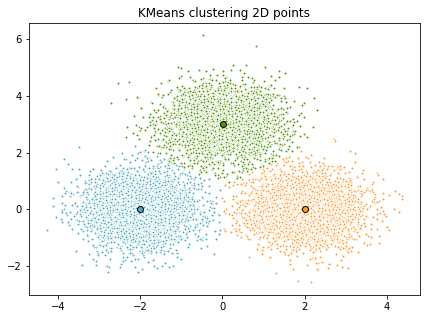

In [4]:
# Plot result
plt.figure(figsize=(7, 5))
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

# get centroids
k_means_cluster_centers = k_means.cluster_centers_
# get label/cluster for each point
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)

for cluster, color in zip(range(n_clusters), colors):
    # indicies to extract points of cluster
    my_members = k_means_labels == cluster
    # cluster center
    cluster_center = k_means_cluster_centers[cluster]
    # plot points
    plt.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=color, marker='.')
    # plot center
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=color, markeredgecolor='k', markersize=6)
    
plt.title('KMeans clustering 2D points')
plt.show()

Processing with k = 2...
Processing with k = 3...
Processing with k = 4...
Processing with k = 5...
Processing with k = 6...
Processing with k = 7...
Processing with k = 8...
Processing with k = 9...
Processing with k = 10...
Processing with k = 11...
Processing with k = 12...
Processing with k = 13...
Processing with k = 14...
Processing with k = 15...


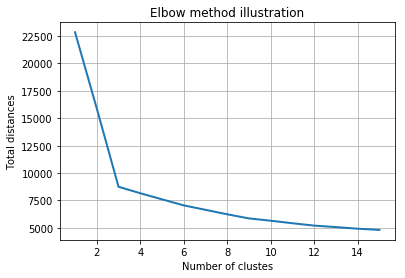

In [5]:
# Elbow method to define number of clusters
# Here we need to calculate sum of distances from points within a cluster to its centroid
# then calculate total distance for each number of k
# then plot and define elbow point

def total_distances(cluster_points, cluster_center):
    """
    calculate sum of distances from points within a cluster to its centroid
    supose cluster_points has shape [number of point, 2]
    cluster_center has shape [2,]
    """
    dif1 = cluster_points - cluster_center
    dif2 = dif1**2
    distances = dif2.sum(axis=1)**0.5
    return distances.sum()

distances = []
# in case 1 cluster 
distances.append(total_distances(X, X.mean(axis=0)))

max_k = 15
for k in range(2,max_k+1):
    print('Processing with k = %d...' % k)
    # fit kmeans
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(X)
    # get centroids
    k_means_cluster_centers = k_means.cluster_centers_
    # get label/cluster for each point
    k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
    
    # calculate distance
    distance = 0
    for cluster in range(k):
        # indicies to extract points of cluster
        k_members = k_means_labels == cluster
        # cluster center
        cluster_center = k_means_cluster_centers[cluster]
        # append total distances within cluster
        distance += total_distances(X[k_members], cluster_center)
        
    distances.append(distance)

# plot result
plt.plot(np.arange(1, max_k+1), distances, linewidth=2)
plt.xlabel('Number of clustes')
plt.ylabel('Total distances')
plt.title('Elbow method illustration')
plt.grid(True)
plt.show()

As we can see from the graph, k = 3 is the optimal value